In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accidents = pd.read_csv("E:/CodingProjects/US Accidents/UScarcrash.csv")

In [4]:
accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
accidents['Temperature(F)']=accidents['Temperature(F)'].fillna(accidents['Temperature(F)'].mean())

In [7]:
weather_numeric = ['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']
for col in weather_numeric:
    accidents[col] = accidents[col].fillna(accidents[col].median())

In [8]:
accidents.drop(['Astronomical_Twilight', 'Nautical_Twilight','Country'], axis=1, inplace=True)

In [9]:
accidents['End_Lat'] = accidents['End_Lat'].fillna(accidents['Start_Lat'])
accidents['End_Lng'] = accidents['End_Lng'].fillna(accidents['Start_Lng'])

In [10]:
accidents['Weather_Condition'] = accidents['Weather_Condition'].fillna('Unknown')
accidents['Wind_Direction'] = accidents['Wind_Direction'].fillna('Unknown')

In [11]:
accidents['Weather_Timestamp'] = accidents['Weather_Timestamp'].fillna(accidents['Start_Time'])

In [12]:
print("Missing values:\n", accidents.isnull().sum().sort_values(ascending=False))

Missing values:
 Sunrise_Sunset       23246
Civil_Twilight       23246
Airport_Code         22635
Street               10869
Timezone              7808
Zipcode               1915
City                   253
Description              5
Severity                 0
Source                   0
ID                       0
Distance(mi)             0
End_Lng                  0
End_Lat                  0
Start_Lng                0
End_Time                 0
Start_Lat                0
Start_Time               0
County                   0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
State                    0
Weather_Timestamp        0
Precipitation(in)        0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Give_Way                 0
Junction                 0
Bump                     0
Crossing                 0
Railway                  0
No_Exit    

In [13]:
accidents['Street'] = accidents['Street'].fillna('Unknown')
accidents['Zipcode'] = accidents['Zipcode'].fillna('Unknown')

In [14]:
accidents.dropna(subset=['Description'], inplace=True)

In [15]:
accidents['City'] = accidents['City'].fillna('Unknown')

In [16]:
accidents.drop(['ID','Source'], axis=1, inplace=True)

In [17]:
accidents.drop([ 'Description', 'County', 'Zipcode', 'Timezone', 'Airport_Code','Wind_Direction', 'Civil_Twilight'], axis=1, inplace=True)

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\832754481.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


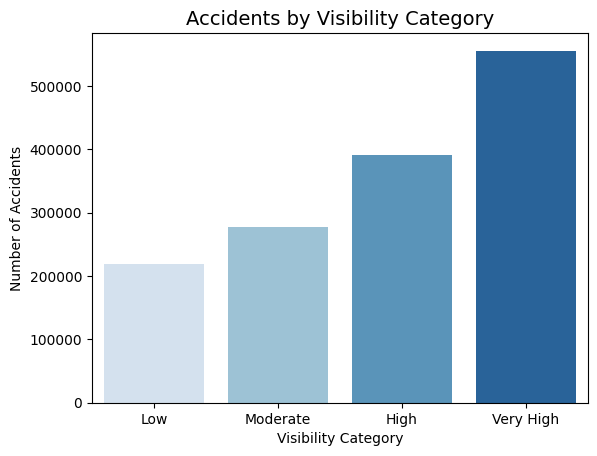

In [18]:
# Convert visibility from miles to kilometers and categorize
accidents['Visibility_Category'] = pd.cut(
    accidents['Visibility(mi)'] * 1.609344,  # Convert miles to kilometers
    bins=[0, 2, 5, 10, 15], 
    labels=['Low', 'Moderate', 'High', 'Very High']
)

# Count the number of accidents in each visibility category
visibility_category_accidents = accidents['Visibility_Category'].value_counts().sort_index()

# Plot the data
sns.barplot(
    x=visibility_category_accidents.index, 
    y=visibility_category_accidents.values, 
    palette='Blues'
)
plt.title('Accidents by Visibility Category', fontsize=14)
plt.xlabel('Visibility Category')
plt.ylabel('Number of Accidents')
plt.show()

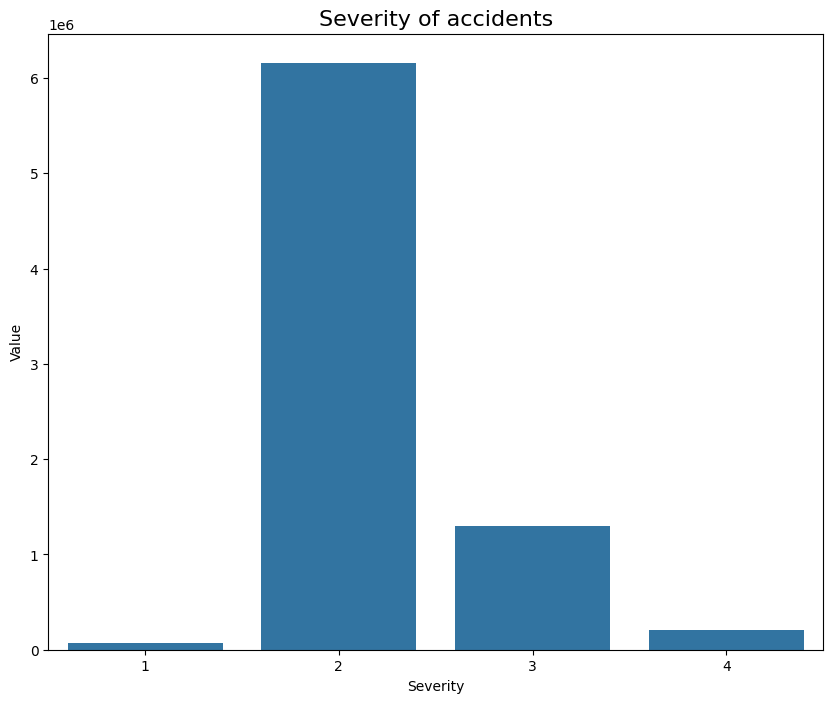

In [19]:
severity_counts = accidents["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Severity of accidents", fontsize=16)
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

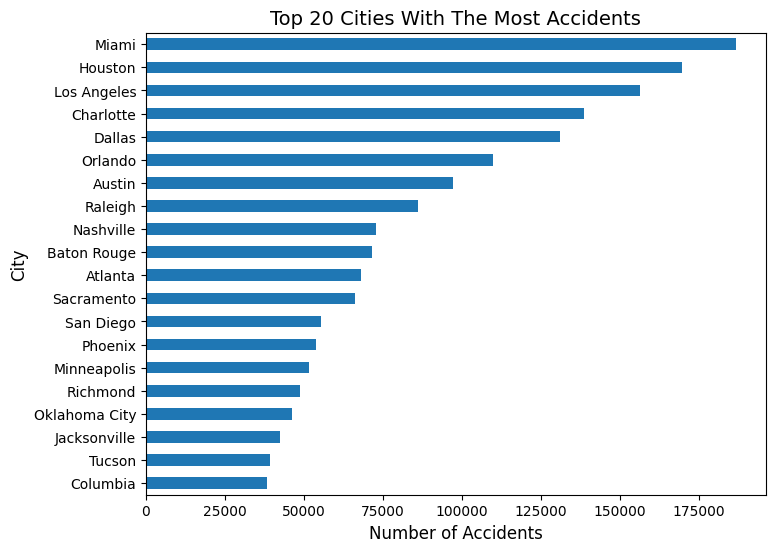

In [20]:
plt.figure(figsize=(8,6))
top_cities =accidents['City'].value_counts().head(20).sort_values()
top_cities.plot(kind='barh')
plt.title('Top 20 Cities With The Most Accidents', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

              City  Severity  Accident_Count
31043       Tucson         1            3229
19266        Miami         2          169909
17371  Los Angeles         3           34927
1131       Atlanta         4            2841


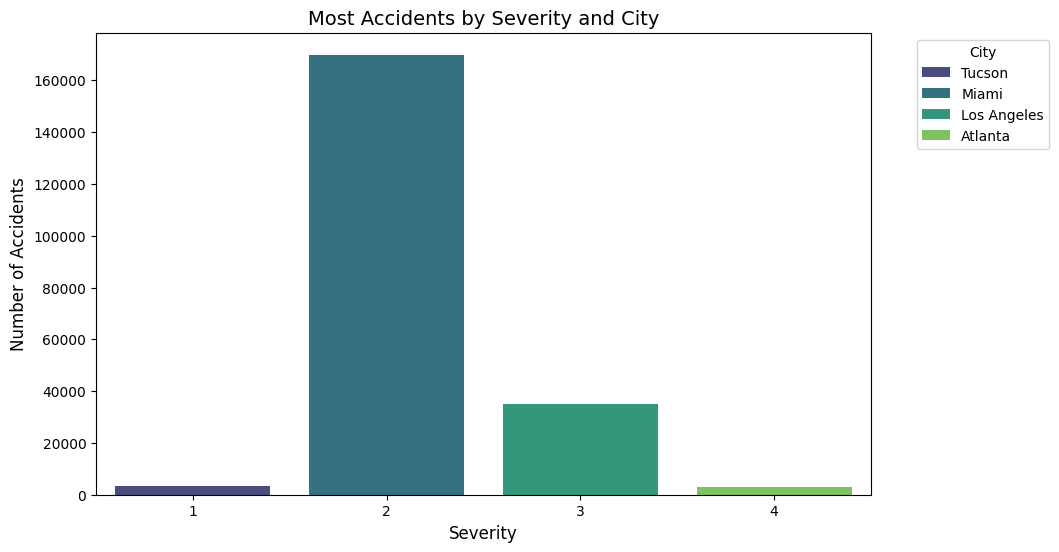

In [21]:
severity_by_city = accidents.groupby(['City', 'Severity']).size().reset_index(name='Accident_Count')

# Find the city with the most accidents for each severity level
most_accidents_by_severity = severity_by_city.loc[severity_by_city.groupby('Severity')['Accident_Count'].idxmax()]

# Display the results
print(most_accidents_by_severity)

# Optional: Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_accidents_by_severity,
    x='Severity',
    y='Accident_Count',
    hue='City',
    palette='viridis'
)
plt.title('Most Accidents by Severity and City', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

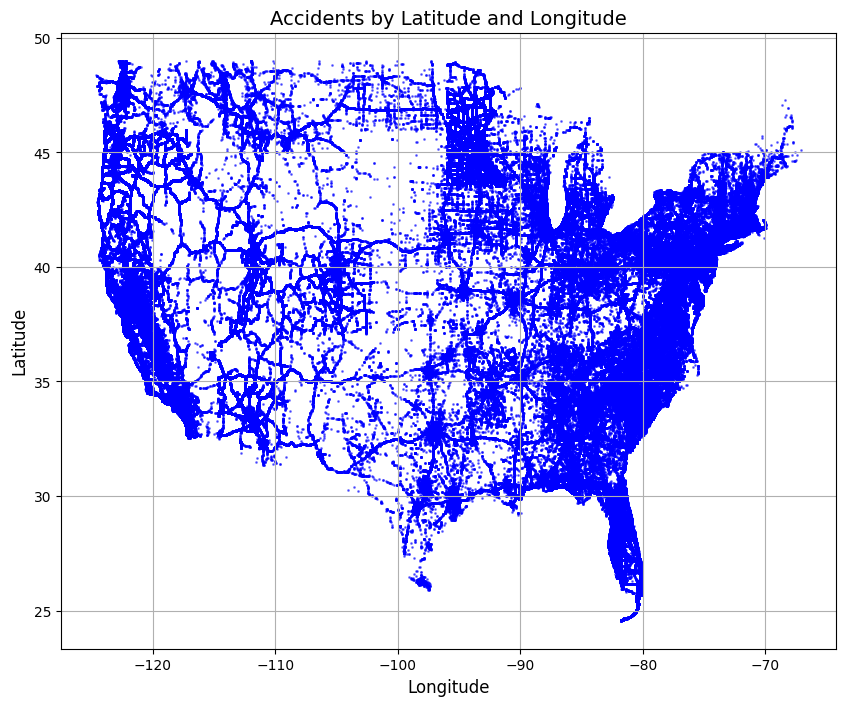

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(accidents['Start_Lng'], accidents['Start_Lat'], alpha=0.5, s=1, c='blue')
plt.title('Accidents by Latitude and Longitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

    Weather_Condition  Accident_Count
16               Fair         2560799
85      Mostly Cloudy         1016194
7              Cloudy          817082
6               Clear          808742
91      Partly Cloudy          698972
88           Overcast          382866
62         Light Rain          352957
106  Scattered Clouds          204829
70         Light Snow          128680
18                Fog           99238


C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\3203367979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


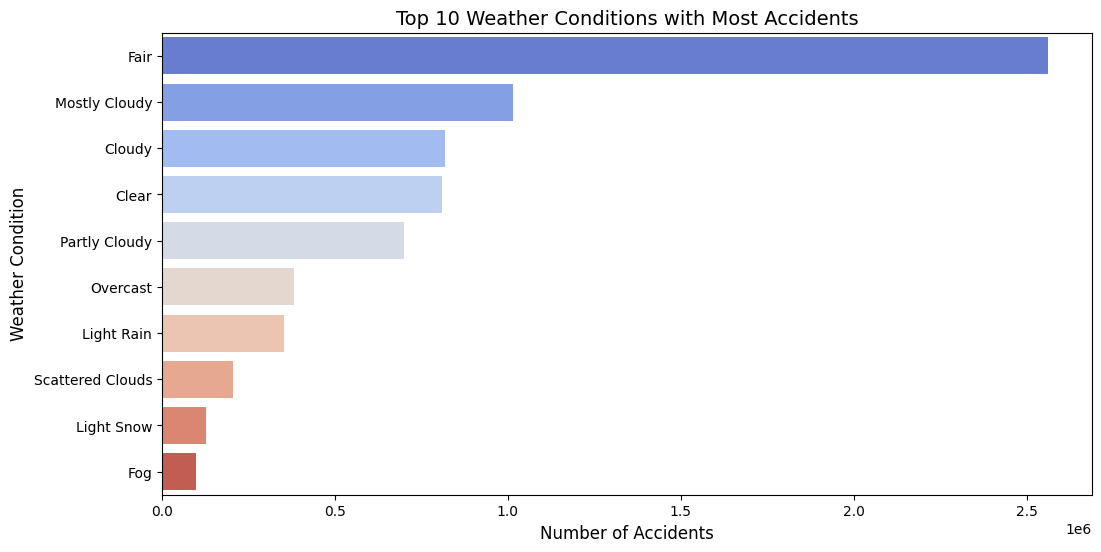

In [25]:
# Exclude 'Unknown' weather conditions
filtered_accidents = accidents[accidents['Weather_Condition'] != 'Unknown']

# Group by Weather_Condition and count the number of accidents
most_accidents_by_weather = filtered_accidents.groupby('Weather_Condition').size().reset_index(name='Accident_Count')

# Sort the results in descending order to get the weather conditions with the most accidents
most_accidents_by_weather = most_accidents_by_weather.sort_values(by='Accident_Count', ascending=False)

# Display the top weather conditions with the most accidents
print(most_accidents_by_weather.head(10))

# Optional: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_accidents_by_weather.head(10),
    x='Accident_Count',
    y='Weather_Condition',
    palette='coolwarm'
)
plt.title('Top 10 Weather Conditions with Most Accidents', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\1580158824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_accidents.values, y=road_accidents.index, palette='coolwarm')


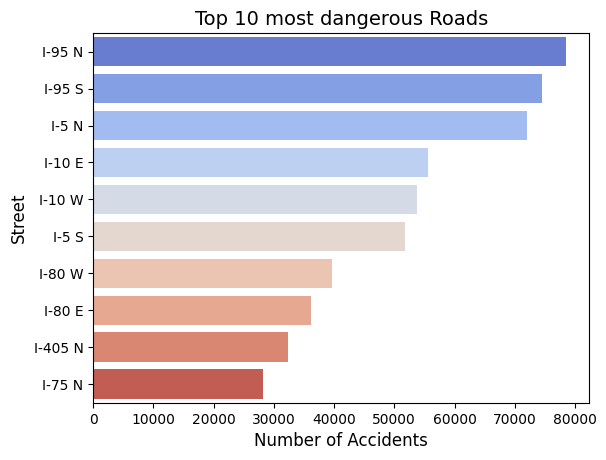

In [30]:
road_accidents = accidents['Street'].value_counts().head(10)
sns.barplot(x=road_accidents.values, y=road_accidents.index, palette='coolwarm')
plt.title('Top 10 most dangerous Roads', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\2330100777.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette='viridis')


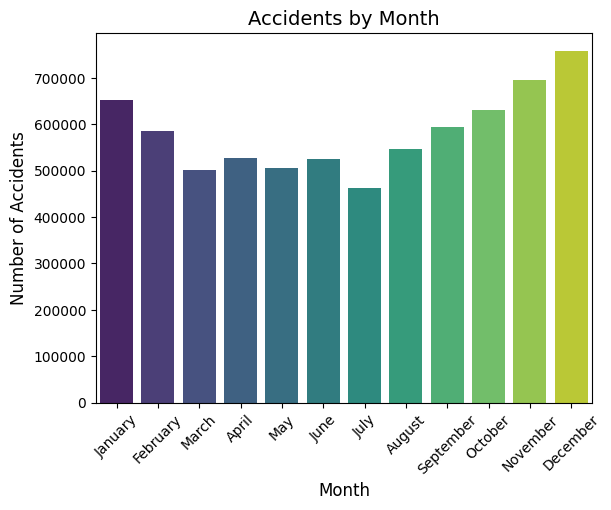

In [ ]:
# Ensure consistent datetime parsing by coercing errors to NaT
accidents['Month'] = pd.to_datetime(accidents['Start_Time'], errors='coerce').dt.month_name()

# Count accidents by month and reindex to ensure proper order
monthly_accidents = accidents['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the data
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette='viridis')
plt.title('Accidents by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\1418592712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_conditions_december.values, y=weather_conditions_december.index, palette='coolwarm')


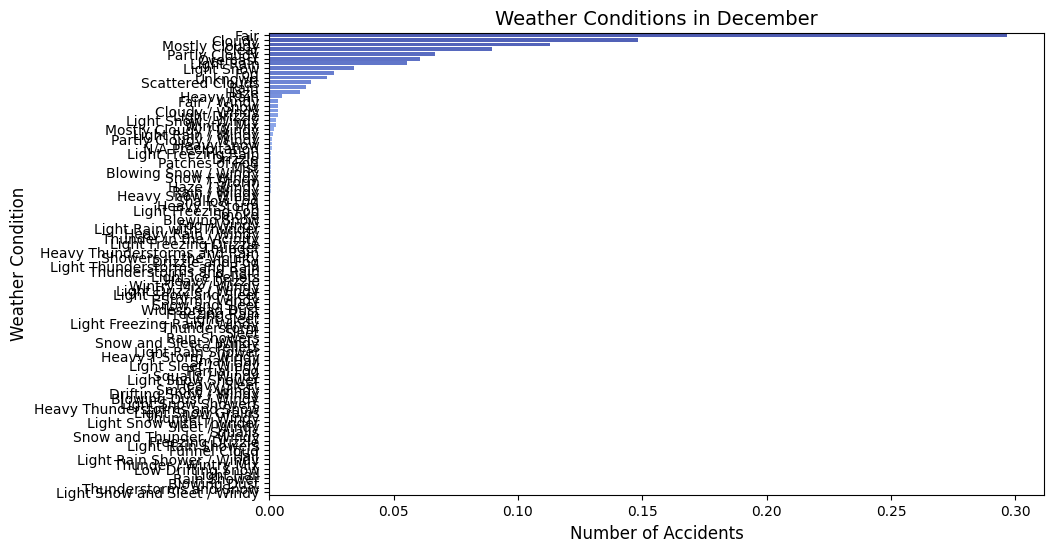

In [ ]:
december_accidents = accidents[accidents['Month'] == 'December']
weather_conditions_december = december_accidents['Weather_Condition'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions_december.values, y=weather_conditions_december.index, palette='coolwarm')
plt.title('Weather Conditions in December', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\3801751997.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


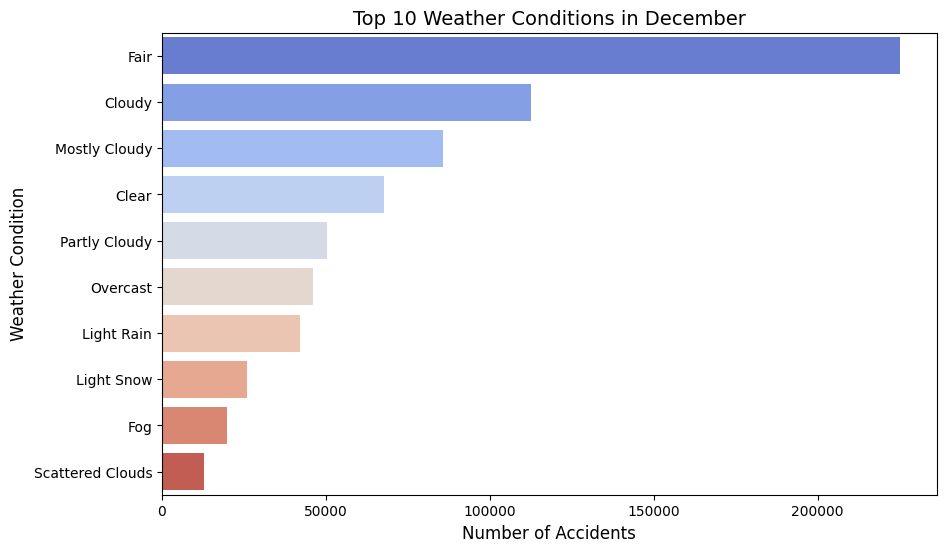

In [45]:
# Filter accidents for December
december_accidents = accidents[accidents['Month'] == 'December']

# Exclude 'Unknown' weather conditions
december_accidents = december_accidents[december_accidents['Weather_Condition'] != 'Unknown']

# Get the top 10 most common weather conditions in December
top_10_weather_conditions = december_accidents['Weather_Condition'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_weather_conditions.values,
    y=top_10_weather_conditions.index,
    palette='coolwarm'
)
plt.title('Top 10 Weather Conditions in December', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\3848818011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


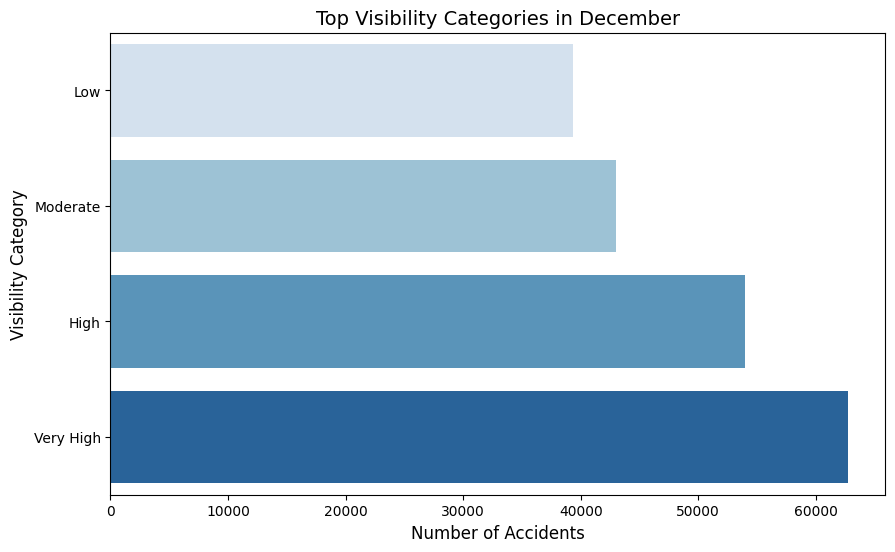

In [46]:
# Filter accidents for December
december_accidents = accidents[accidents['Month'] == 'December']

# Count the number of accidents in each visibility category
visibility_category_december = december_accidents['Visibility_Category'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(
    x=visibility_category_december.values,
    y=visibility_category_december.index,
    palette='Blues'
)
plt.title('Top Visibility Categories in December', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Visibility Category', fontsize=12)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\3153495672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_accidents['Day'] = pd.to_datetime(december_accidents['Start_Time']).dt.day


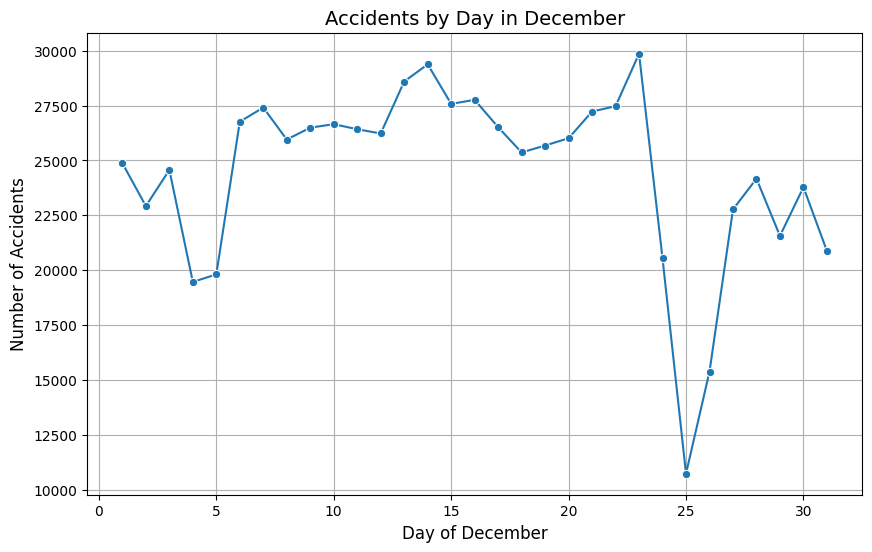

In [47]:
december_accidents['Day'] = pd.to_datetime(december_accidents['Start_Time']).dt.day
daily_accidents_december = december_accidents['Day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_accidents_december.index, y=daily_accidents_december.values, marker='o')
plt.title('Accidents by Day in December', fontsize=14)
plt.xlabel('Day of December', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

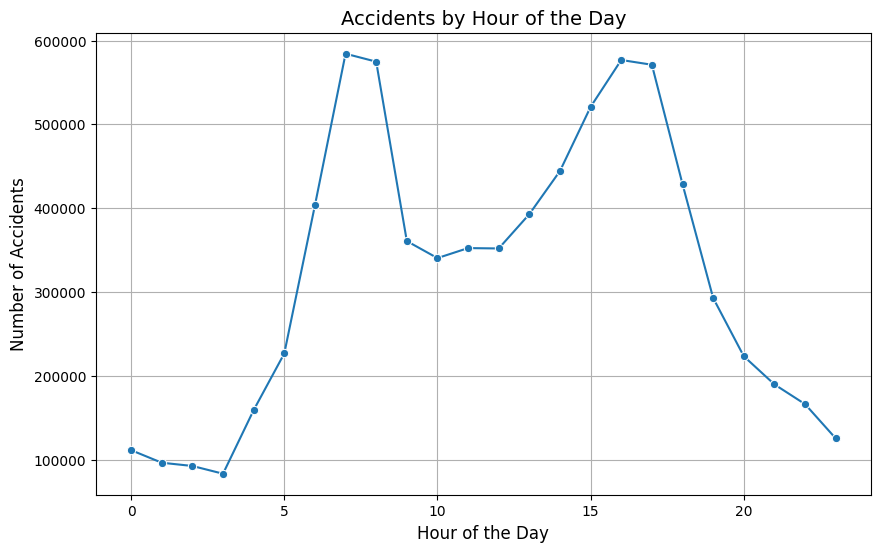

In [49]:
# Clean the Start_Time column to remove problematic suffixes
accidents['Start_Time'] = accidents['Start_Time'].str.replace(r'\.000000000', '', regex=True)

# Convert Start_Time to datetime and extract the hour
accidents['Hour'] = pd.to_datetime(accidents['Start_Time'], errors='coerce').dt.hour

# Count accidents by hour
hourly_accidents = accidents['Hour'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o')
plt.title('Accidents by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\1171599585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_accidents.index[:10], y=state_accidents.values[:10], palette='magma')


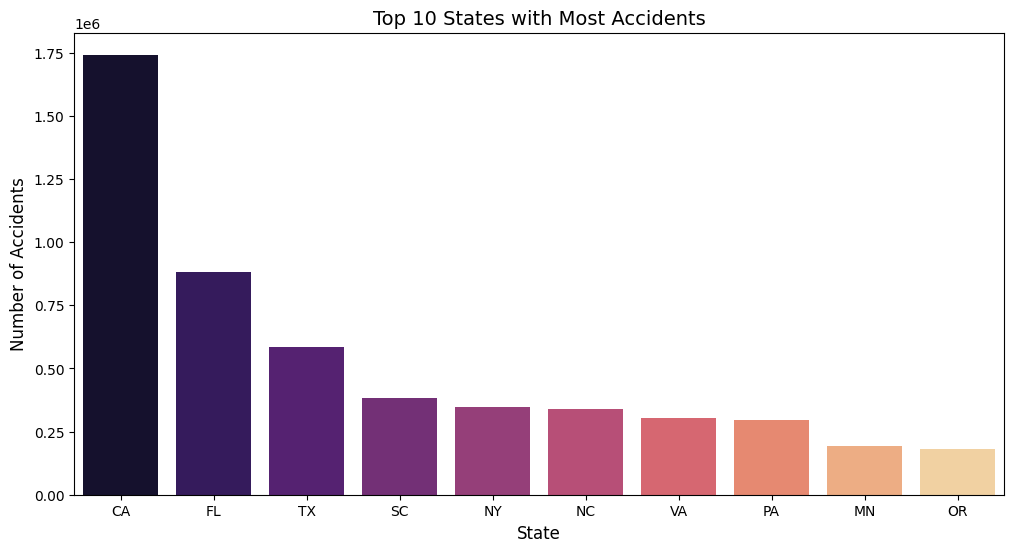

In [50]:
state_accidents = accidents['State'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_accidents.index[:10], y=state_accidents.values[:10], palette='magma')
plt.title('Top 10 States with Most Accidents', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()

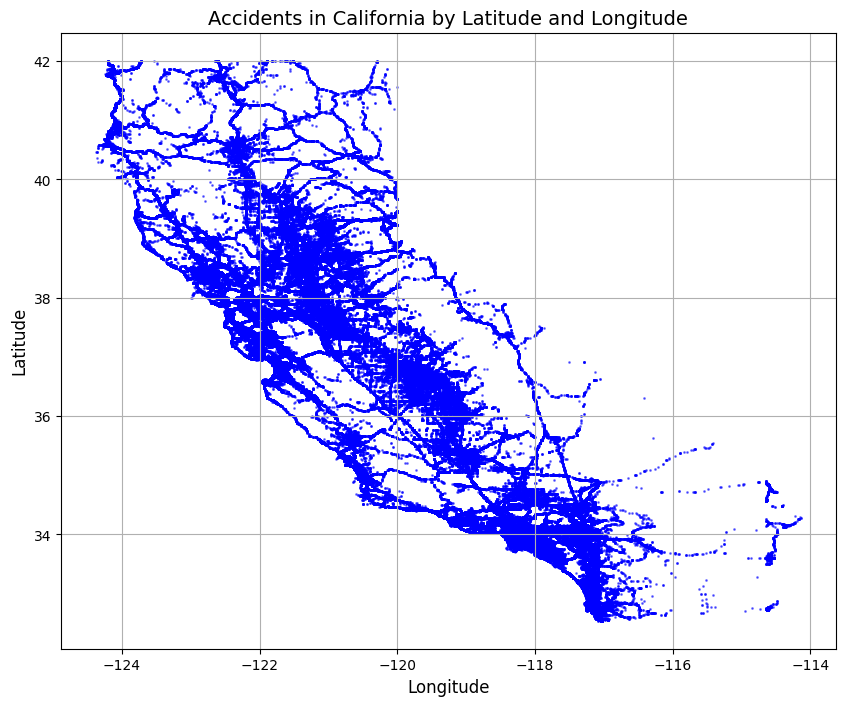

In [51]:
# Filter accidents for California
california_accidents = accidents[accidents['State'] == 'CA']

# Plot the latitude and longitude for California
plt.figure(figsize=(10, 8))
plt.scatter(
    california_accidents['Start_Lng'], 
    california_accidents['Start_Lat'], 
    alpha=0.5, 
    s=1, 
    c='blue'
)
plt.title('Accidents in California by Latitude and Longitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\2077189641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_ca.index, y=severity_ca.values, palette='viridis')


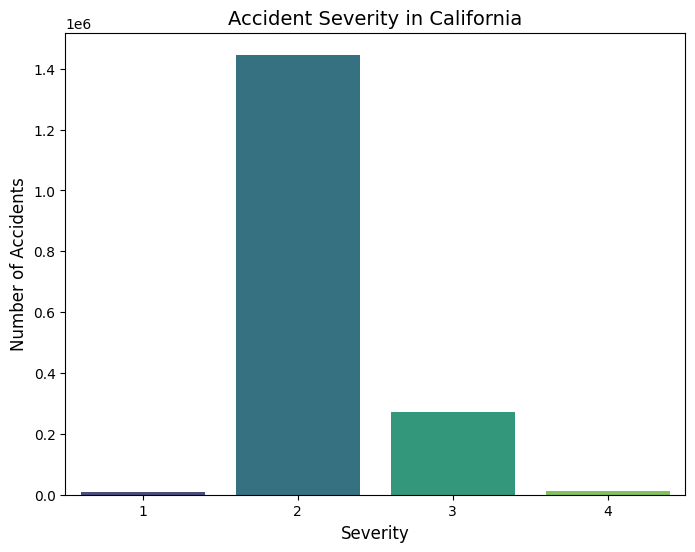

In [56]:
severity_ca = california_accidents['Severity'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=severity_ca.index, y=severity_ca.values, palette='viridis')
plt.title('Accident Severity in California', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()

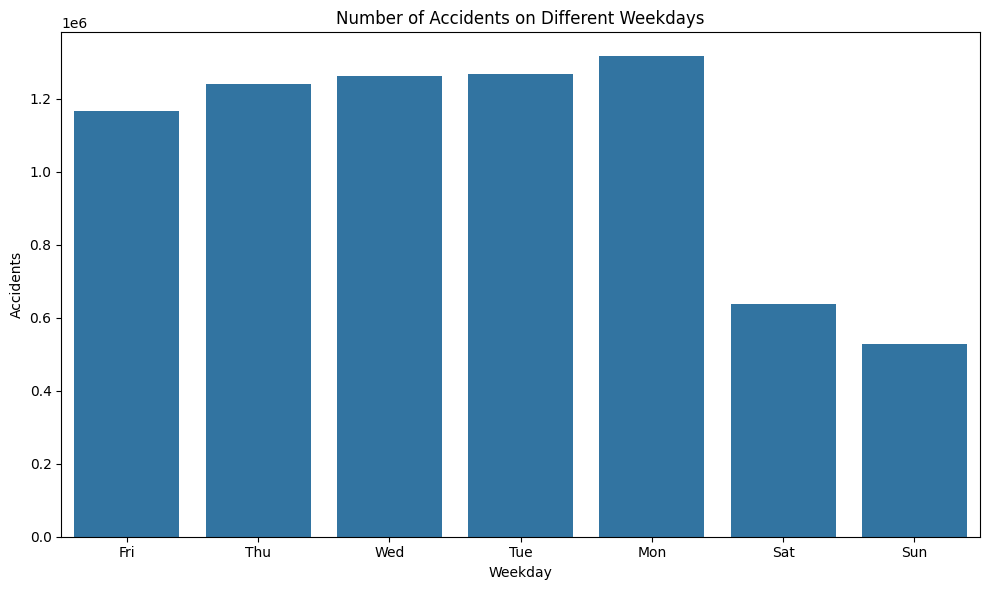

In [62]:
# How many accidents on different weekdays
accidents['Weekday'] = pd.to_datetime(accidents['Start_Time']).dt.weekday  # Monday=0, Sunday=6
df3 = accidents.groupby(['Weekday']).size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df3.index, y=df3.values)
plt.ylabel('Accidents')
plt.title("Number of Accidents on Different Weekdays")
plt.xticks(df3.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set labels for weekdays

plt.tight_layout()
plt.show()

C:\Users\ismar\AppData\Local\Temp\ipykernel_13920\2652086136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streets_ca.values, y=top_streets_ca.index, palette='coolwarm')


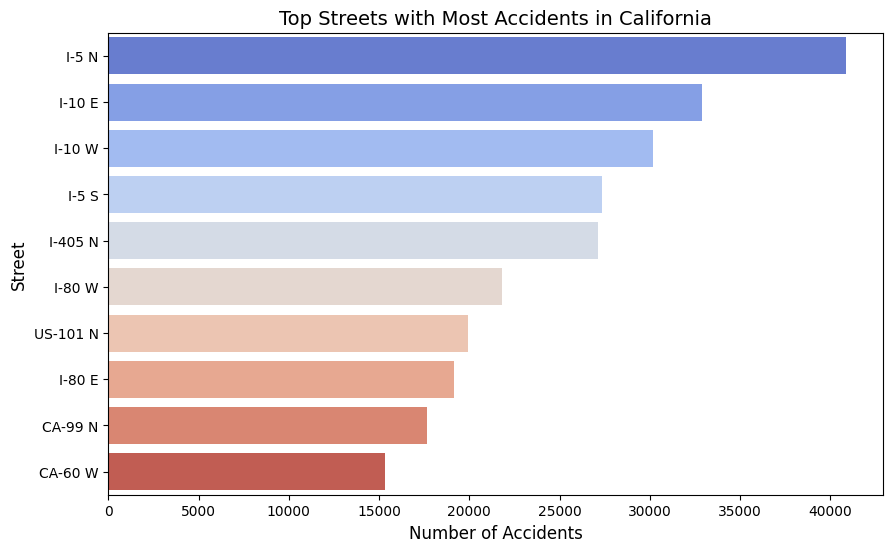

In [63]:
top_streets_ca = california_accidents['Street'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_streets_ca.values, y=top_streets_ca.index, palette='coolwarm')
plt.title('Top Streets with Most Accidents in California', fontsize=14)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()

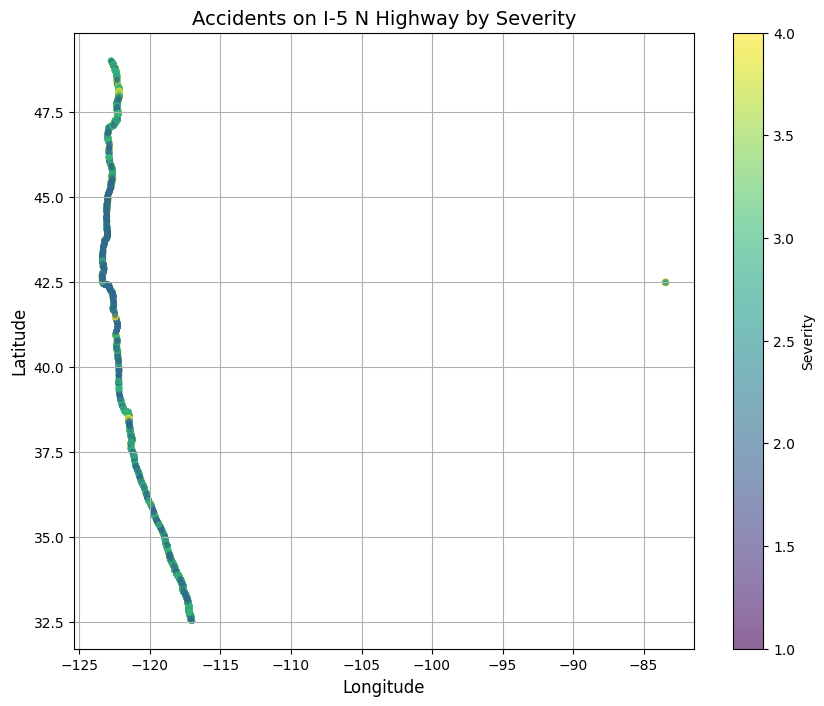

In [80]:
# Filter accidents for the I-5 N Highway
i5_accidents = accidents[accidents['Street'].str.contains('I-5 N', na=False)]

# Sample the data to reduce density (e.g., 50% of the data)
sampled_accidents = i5_accidents.sample(frac=0.5, random_state=42)

# Plot the latitude and longitude for accidents on I-5 N with severity as color and size
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    sampled_accidents['Start_Lng'], 
    sampled_accidents['Start_Lat'], 
    c=sampled_accidents['Severity'],  # Color by severity
    cmap='viridis',  # Colormap for severity
    alpha=0.6,  # Transparency
    s=sampled_accidents['Severity'] * 5  # Scale size by severity (smaller points)
)
plt.colorbar(scatter, label='Severity')  # Add a colorbar for severity
plt.title('Accidents on I-5 N Highway by Severity', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

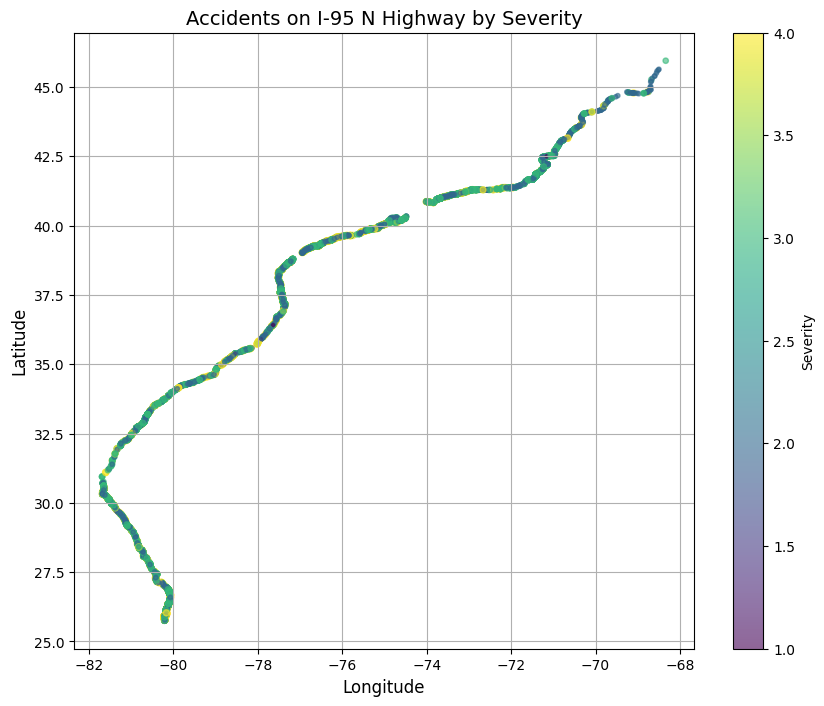

In [82]:
# Filter accidents for the I-95 N Highway
i95_accidents = accidents[accidents['Street'].str.contains('I-95 N', na=False)]

# Sample the data to reduce density (e.g., 50% of the data)
sampled_accidents = i95_accidents.sample(frac=0.5, random_state=42)

# Plot the latitude and longitude for accidents on I-95 N with severity as color and size
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    sampled_accidents['Start_Lng'], 
    sampled_accidents['Start_Lat'], 
    c=sampled_accidents['Severity'],  # Color by severity
    cmap='viridis',  # Colormap for severity
    alpha=0.6,  # Transparency
    s=sampled_accidents['Severity'] * 5  # Scale size by severity (smaller points)
)
plt.colorbar(scatter, label='Severity')  # Add a colorbar for severity
plt.title('Accidents on I-95 N Highway by Severity', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()